In [1]:
import pandas as pd

In [2]:
from keras.layers import Input, Dense
from snn import SNN, Entity, Relation

Using TensorFlow backend.


In [3]:
Person = Entity("Person")
Movie = Entity("Movie")

In [4]:
df = pd.read_csv("../data/relations.tsv", sep="\t", names=['Movie', 'Relation', 'Person'], nrows=100000)

In [5]:
df.head()

,Movie,Relation,Person
0,Carmencita,self,Carmencita
1,Carmencita,director,William K.L. Dickson
2,Carmencita,cinematographer,William Heise
3,Le clown et ses chiens,director,Émile Reynaud
4,Le clown et ses chiens,composer,Gaston Paulin


In [6]:
relations = {l: Relation(label=l, dst=Person, src=Movie) for l in df['Relation'].unique()}
relations

{'actor': actor(<Movie> , <Person>),
 'actress': actress(<Movie> , <Person>),
 'archive_footage': archive_footage(<Movie> , <Person>),
 'cinematographer': cinematographer(<Movie> , <Person>),
 'composer': composer(<Movie> , <Person>),
 'director': director(<Movie> , <Person>),
 'editor': editor(<Movie> , <Person>),
 'producer': producer(<Movie> , <Person>),
 'production_designer': production_designer(<Movie> , <Person>),
 'self': self(<Movie> , <Person>),
 'writer': writer(<Movie> , <Person>)}

In [7]:
entities = [Person, Movie]
entities

[<Person>, <Movie>]

In [8]:
X = [t.Person + " @ " + t.Movie for t in df.itertuples()]
y = [[relations[t.Relation]] for t in df.itertuples()]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv = CountVectorizer()
Xt = cv.fit_transform(X)

In [11]:
x = Input(shape=(Xt.shape[1],))
snn = SNN(entities=entities, relations=relations.values())
output = snn(x)

In [12]:
from snn.utils import draw

In [13]:
snn_model = snn.build(x)

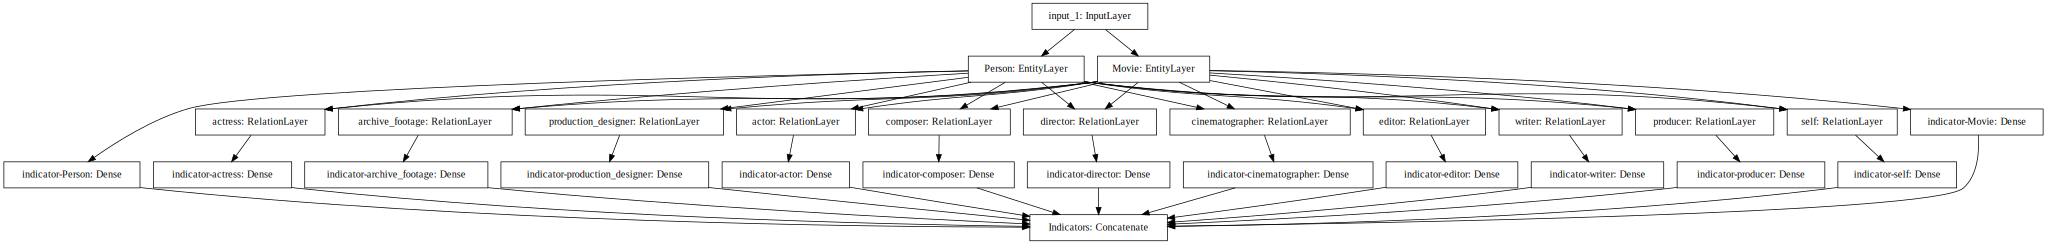

In [14]:
draw(snn_model)

In [15]:
yp = snn_model.predict(Xt)
yp = (yp > 0.5).astype(int)
yp

array([[1, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1]])

In [16]:
yt = snn.map(y)
yt

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
(yp == yt).mean()

0.4819376923076923

In [ ]:
snn_model.fit(Xt, yt, epochs=10, validation_split=0.1)

Train on 90000 samples, validate on 10000 samples
Epoch 1/10
90000/90000 [==============================] - 64s 708us/step - loss: 0.1134 - val_loss: 0.1286
Epoch 2/10
90000/90000 [==============================] - 62s 689us/step - loss: 0.0837 - val_loss: 0.1266
Epoch 3/10
90000/90000 [==============================] - 61s 674us/step - loss: 0.0781 - val_loss: 0.1327
Epoch 4/10
29920/90000 [========>.....................] - ETA: 39s - loss: 0.0732

In [ ]:
yp = snn_model.predict(Xt)
yp = (yp > 0.5).astype(int)
(yp == yt).mean()